# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Import Libraries

In [1]:
# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_sm')

## Load Data

In [3]:
# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [4]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [5]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

In [18]:
# understand size of the data
print('Train set size:', X_train.shape)
print('Test set size:', X_test.shape)
print('Train set size:', y_train.shape)
print('Train set size:', y_test.shape)

Train set size: (16597, 8)
Test set size: (1845, 8)
Train set size: (16597,)
Train set size: (1845,)


In [14]:
# What does X look like?
X_train.head()

,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
893,1060,37,Super cute. pockets would be nice,Easy and fun jumper. runs slightly large. i or...,2,General Petite,Bottoms,Pants
1767,1072,23,Great for all seasons,The dress looks great both in winter and summe...,0,General Petite,Dresses,Dresses
4491,1078,41,Just ok,I wanted to love this dress as it seemed perfe...,10,General,Dresses,Dresses
17626,862,52,Cute but...,I loved this shirt when i purchased it but it ...,6,General Petite,Tops,Knits
11184,1083,28,Grandmas draperies dress,I had to review this because i purchased befor...,3,General,Dresses,Dresses


In [ ]:
# Statistics for the numerical data points
X.describe()

,Clothing ID,Age,Positive Feedback Count
count,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484
std,141.571783,12.246264,5.942220
min,2.000000,18.000000,0.000000
25%,863.000000,34.000000,0.000000
50%,952.000000,41.000000,1.000000
75%,1078.000000,52.000000,3.000000
max,1205.000000,99.000000,122.000000


In [82]:
y.describe()

count    18442.000000
mean         0.816235
std          0.387303
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended IND, dtype: float64

In [ ]:
# is there a balanced dataset?
# check balance


In [ ]:
# Explore categorical data (How many groups? How many in each group?)
# Exclude 'Title' and 'Review Text' for now
for catvar in ['Division Name', 'Department Name', 'Class Name']:
    print(X[catvar].value_counts())

General           11664
General Petite     6778
Name: Division Name, dtype: int64
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: Department Name, dtype: int64
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: Class Name, dtype: int64


<AxesSubplot:>

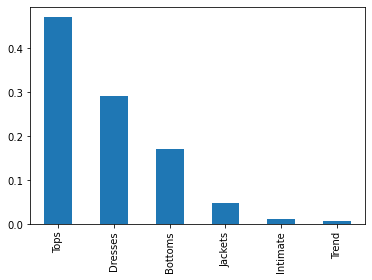

In [ ]:
# Visualise as an example
X_train['Department Name'].value_counts(normalize=True).plot(kind='bar')

In [39]:
# Check for normal distribution for the numerical data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


def plot_distribution(data, feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.subplot(1, 2, 2)
    sm.qqplot(data[feature], line='s', ax=plt.gca())
    plt.title(f'QQ Plot of {feature}')
    plt.show()

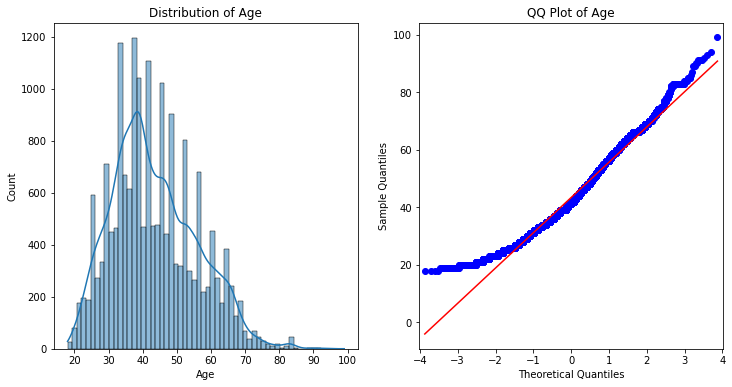

In [ ]:
plot_distribution(X, 'Age') # almost normal, but tail end is skewed

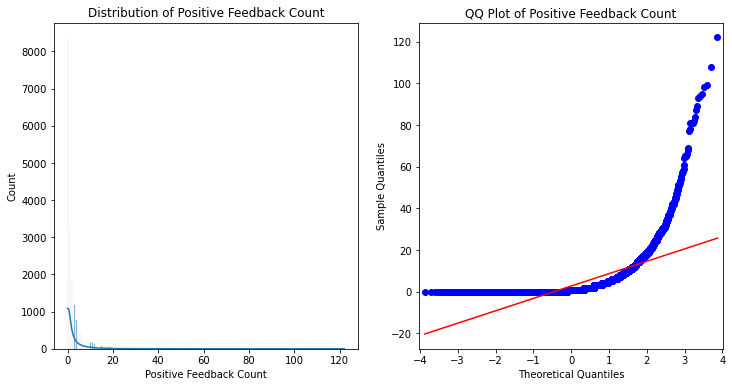

In [ ]:
plot_distribution(X, 'Positive Feedback Count') # not normally distributed

In [ ]:
# Statistical test for normality
# Shapiro-Wilk test

from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(X['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpret the p-value
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.977, p=0.000
Sample does not look Gaussian (reject H0)


c:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
# Try the Anderson-Darling test as the Shapiro-Wilk test is not suitable for large datasets
# Anderson-Darling test

def Anderson_Darling_test(data):
    
    result = stats.anderson(data, dist='norm')  # Test against a normal distribution

    # Output the test statistic and critical values
    print(f"Test Statistic: {result.statistic}")
    print("Critical Values:")
    for i, critical_value in enumerate(result.critical_values):
        significance_level = result.significance_level[i]
        print(f"  {significance_level}%: {critical_value}")

    # Determine if the null hypothesis can be rejected
    if result.statistic < result.critical_values[2]:  # Compare with the 5% critical value
        return "The null hypothesis cannot be rejected (data is likely normal)."
    else:
        return "The null hypothesis can be rejected (data is likely not normal)."


In [49]:
Anderson_Darling_test(X['Age'])

Test Statistic: 119.18091381756676
Critical Values:
  15.0%: 0.576
  10.0%: 0.656
  5.0%: 0.787
  2.5%: 0.918
  1.0%: 1.092


'The null hypothesis can be rejected (data is likely not normal).'

In [50]:
Anderson_Darling_test(X['Positive Feedback Count'])

Test Statistic: 2781.6398912296936
Critical Values:
  15.0%: 0.576
  10.0%: 0.656
  5.0%: 0.787
  2.5%: 0.918
  1.0%: 1.092


'The null hypothesis can be rejected (data is likely not normal).'

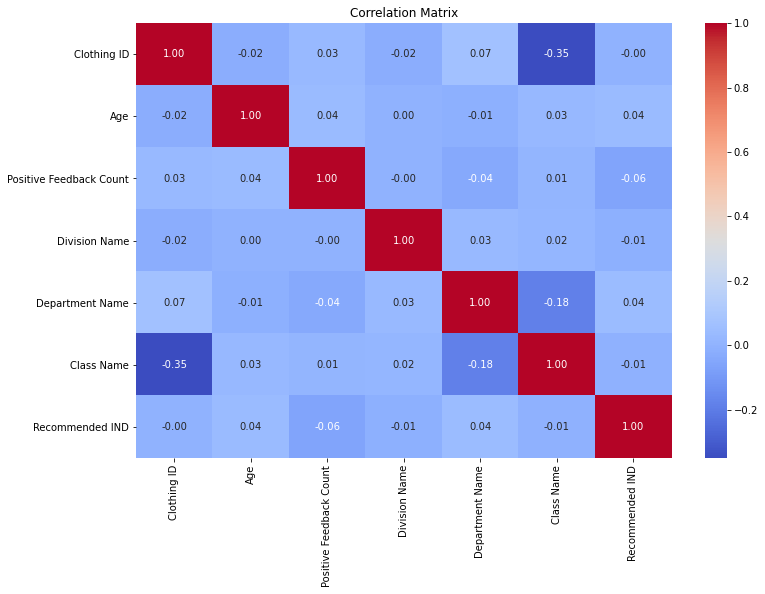

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Explore data correlation with correlation matrix
data2 = data.copy()
for c in data2.columns:
    if c in ['Division Name', 'Department Name', 'Class Name']:
        # One hot encoding for our categorical variables
        # column = pd.DataFrame(data[c])
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        data2[c] = encoder.fit_transform(data2[[c]])

# calculate correlation matrix
corr_matrix = data2.corr()
# plot the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

        

## Building Pipeline

In [6]:
# Define categorical and numerical features, and features for NLP (textual)
# Exclude 'Clothing ID' as this is a unique identifier 
categorical_features = [
    'Division Name',
    'Department Name',
    'Class Name'
]
numerical_features = [
    'Age',
    'Positive Feedback Count'
]
textual_features = [
    'Title',
    'Review Text'
]

##### Define pre-processing steps for categorical and numerical features

In [7]:
# Define pipeline for numerical features 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Although there are no null values we can include this for completeness
    ('scaler', RobustScaler()) # Standardize the numerical features. As our data is not normally distributed we will scale using RobustScaler as it is less sensitive to outliers
])
X_train_num_pipe = numerical_transformer.fit_transform(X_train[numerical_features])

# Print to compare output with original data
print(X_train_num_pipe[0:5])
print(X_train[numerical_features][0:5])

[[-0.27777778  0.33333333]
 [-1.05555556 -0.33333333]
 [-0.05555556  3.        ]
 [ 0.55555556  1.66666667]
 [-0.77777778  0.66666667]]
       Age  Positive Feedback Count
893     37                        2
1767    23                        0
4491    41                       10
17626   52                        6
11184   28                        3


In [8]:
# Define pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Although there are no null values we can include this for completeness
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # One hot encoding for our categorical variables
])
X_train_cat_pipe = pd.DataFrame(categorical_transformer.fit_transform(X_train[categorical_features]), columns=categorical_transformer.get_feature_names_out(), index=X_train[categorical_features].index)

# Print to compare output 
print(X_train_cat_pipe.head())
# print(X_train[categorical_features].head())

       Division Name_General  Division Name_General Petite  \
893                      0.0                           1.0   
1767                     0.0                           1.0   
4491                     1.0                           0.0   
17626                    0.0                           1.0   
11184                    1.0                           0.0   

       Department Name_Bottoms  Department Name_Dresses  \
893                        1.0                      0.0   
1767                       0.0                      1.0   
4491                       0.0                      1.0   
17626                      0.0                      0.0   
11184                      0.0                      1.0   

       Department Name_Intimate  Department Name_Jackets  \
893                         0.0                      0.0   
1767                        0.0                      0.0   
4491                        0.0                      0.0   
17626                       0.0 

In [9]:
# Create classes for text processing
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def normalise(self, X):
        X_transformed = X.copy()

        for column in X_transformed.columns:
            # Convert to lowercase
            X_transformed[column] = X_transformed[column].str.lower()

            # Remove punctuation and special characters
            X_transformed[column] = X_transformed[column].str.replace(r'[^\w\s]', '', regex=True)

        return X_transformed
    
    def tokenise(self, X):
        X_transformed = X.copy()

        for column in X_transformed.columns:
            # Split text into tokens
            X_transformed[column] = X_transformed[column].str.split()

        return X_transformed
    
    def transform(self, X):
        # Normalise
        X = self.normalise(X)
        # Tokenise
        # X = self.tokenise(X) #we may not need this as spacy will handle tokenization
        return X
      
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        # self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a copy of the DataFrame to avoid modifying the original
        X_transformed = X.copy()

        # for column in self.columns:
            # Check if the column exists in the DataFrame
        for column in X_transformed.columns:
            # Convert pandas Series input to list of strings
            texts = X_transformed[column].astype(str).tolist()

            # Lemmatization process
            lemmatized = [
                ' '.join(
                    token.lemma_ for token in doc
                    if not token.is_stop
                )
                for doc in self.nlp.pipe(texts)
            ]

            # Assign the lemmatized text back to the DataFrame
            X_transformed[column] = lemmatized

        return X_transformed
 
class TfidfConverter(TfidfVectorizer):
    def __init__(self, textual_features, **kwargs):
        super().__init__(**kwargs)
        self.textual_features = textual_features  # Store the textual features

    def fit(self, X, y=None):
        # Combine all text columns into a single column for fitting
        combined_text = X[self.textual_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        # Fit the vectorizer on the combined text
        return super().fit(combined_text)

    def transform(self, X):
        # Combine all text columns into a single column for transforming
        combined_text = X[self.textual_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Transform the combined text using the fitted vectorizer
        tfidf_matrix = super().transform(combined_text)

        # Convert to DataFrame
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=self.get_feature_names_out())
        return tfidf_df


    def fit_transform(self, X, y=None):
        # Combine all text columns into a single column for transforming
        combined_text = X[self.textual_features].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Transform the combined text using the fitted vectorizer
        tfidf_matrix = super().fit_transform(combined_text)

        # Convert to DataFrame
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=self.get_feature_names_out())
        return tfidf_df

In [10]:
# Define pre-processing pipeline for textual features

textual_transformer = Pipeline(steps=[
    ('text_preprocessor', TextPreprocessor()), 
    ('spacy_lemmatizer', SpacyLemmatizer(nlp=nlp)),
    ('tfidf_converter', TfidfConverter(textual_features=textual_features,stop_words='english'))  # Feature extraction

])

X_train_text_pipe = pd.DataFrame(textual_transformer.fit_transform(X_train[textual_features].head()))

print(X_train_text_pipe)

        140        57      able     appal     badly       bit      boot  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.176852  0.000000  0.000000  0.000000  0.000000   
2  0.154085  0.154085  0.000000  0.000000  0.000000  0.154085  0.154085   
3  0.000000  0.000000  0.000000  0.000000  0.256534  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.162588  0.000000  0.000000  0.000000   

     bootie    breast       buy  ...      true       try   variety        ve  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.232044  0.000000   
1  0.000000  0.176852  0.142683  ...  0.176852  0.000000  0.000000  0.000000   
2  0.154085  0.000000  0.000000  ...  0.000000  0.308169  0.000000  0.000000   
3  0.000000  0.000000  0.206970  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.162588   

      waist      want  weardoesnt    winter      work   wrinkle  
0 

In [11]:
# Combine numerical and categorical features in column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', textual_transformer, textual_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Age', 'Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Division Name', 'Department Name',
                                  'Class Name']),
                                ('text',
                                 Pipeline(steps=[('text_preprocessor',
                                                  TextPreprocessor()),
                                                 ('spacy_lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026A844201A0>)),
                                                 ('tfidf_converter',
                                                  TfidfConverter(textual_features=['Title',
                                                                                   'Review '
                                                                                   'Text']))]),
                                 ['Title', 'Review Text'])])

## Training Pipeline

We will train two pipelines to determine which ML model is more appropriate and/or performs better for our data between Logistic Regression and Random Forest. We will create separate pipelines for both. Then, we will use a function to fit and predict the model. Afterwards we will compare and evaluate both model's outputs based on metrics such as accuracy, precision, recall, F1 score, and ROC AUC. We will then select the ML technique that is most appropriate for our fine-tuning stage.

In [25]:
# Create model pipeline
# Logistic regression pipeline
model_pipeline_log = make_pipeline(
    preprocessor,
    LogisticRegression(random_state = 1532)
)

model_pipeline_log

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('text',
                                                  Pipeline(steps=[('text_preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('spacy_lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026A844201A0>)),
                                                                  ('tfidf_converter',
                                                                   TfidfConverter(textual_features=['Title',
                                                                                                    'Review '
                                                                                                    'Text']))]),
                                                  ['Title', 'Review Text'])])),
                ('logisticregression', LogisticRegression(random_state=1532))])

In [13]:
# Create model pipeline
# Random forest pipeline
model_pipeline_rforest = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state = 1532)
)

model_pipeline_rforest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Division Name',
                                                   'Depar...',
                                                   'Class Name']),
                                                 ('text',
                                                  Pipeline(steps=[('text_preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('spacy_lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x0000026A844201A0>)),
                                                                  ('tfidf_converter',
                                                                   TfidfConverter(textual_features=['Title',
                                                                                                    'Review '
                                                                                                    'Text']))]),
                                                  ['Title', 'Review Text'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=1532))])

In [15]:
# Function to fit the model and make predictions
def fit_and_predict(pipeline, X_train, y_train, X_test):
    # Fit the model
    pipeline.fit(X_train, y_train)
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    return y_pred

In [23]:
# Function for outputting 
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score": {f1:.2f}')
    print(f'ROC AUC": {roc_auc:.2f}')

In [26]:
# Fit and predict, and evaluate logistic regression model
y_pred_logreg = fit_and_predict(model_pipeline_log, X_train, y_train, X_test)
evaluate(y_test, y_pred_logreg)

d:\Projects\DS Nanodegree\dsnd-pipelines-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.89
Precision: 0.91
Recall: 0.97
F1 Score": 0.94
ROC AUC": 0.75


In [ ]:
# Fit and predict, and evaluate random forest model
y_pred_rforest = fit_and_predict(model_pipeline_rforest, X_train, y_train, X_test)
evaluate(y_test, y_pred_rforest)

Accuracy: 0.86
Precision: 0.86
Recall: 0.99
F1 Score": 0.92
ROC AUC": 0.61


Our evaluation of the two models reveals that Logistic Regression outperforms Random Forest in most metrics, including accuracy, preciision, F1, and ROC AUC. As recall is not as important for our use case, it makes sense to use Logistic Regression. We will now fine-tune our chosen model.

#### Old code for model fit (pre-pipeline) > delete later

In [ ]:
# Create a pipeline that includes the preprocessor (column transformer)
preprocessor_pipeline = Pipeline(steps=[
    ('preprocessor2', preprocessor)
])

# Fit pipeline on training data
transformed_X_train = preprocessor_pipeline.fit_transform(X_train)

# Also apply on X_test for consistency when we get predictions later
# transformed_X_test = preprocessor_pipeline.fit_transform(X_test)


# Get feature names from the Columntransformer (preprocessor) and access feature names from each transformer
get_num_names = numerical_features
get_cat_names = preprocessor_pipeline.named_steps['preprocessor2'].named_transformers_['cat'].get_feature_names_out(categorical_features)
get_text_names = preprocessor_pipeline.named_steps['preprocessor2'].named_transformers_['text'].named_steps['tfidf_converter'].get_feature_names_out()

# Combine all feature names into single list
all_feature_names = np.concatenate([get_num_names, get_cat_names, get_text_names])

# Convert to DataFrame with all feature names for X_train
X_train_transformed = pd.DataFrame(transformed_X_train, columns=all_feature_names)

# Convert to DataFrame with all feature names for X_test
# X_test_transformed = pd.DataFrame(transformed_X_test, columns=all_feature_names)


In [25]:
X_train_transformed.head()

,Age,Positive Feedback Count,Division Name_General,Division Name_General Petite,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,...,zipperydodah,zipping,zips,zipup,zoe,zone,zoolander,zoom,zowie,ã¼ber
0,-0.277778,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.055556,-0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.055556,3.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.555556,1.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.777778,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Transform X_test using the fitted data
transformed_X_test = preprocessor_pipeline.transform(X_test)


In [27]:
# Logistic Regression
model = LogisticRegression(random_state=1532)
model.fit(X_train_transformed, y_train)


d:\Projects\DS Nanodegree\dsnd-pipelines-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1532)

In [29]:
# Predictions for Logistic
y_pred = model.predict(transformed_X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


d:\Projects\DS Nanodegree\dsnd-pipelines-project\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
coeffs = model.coef_
print("coefficients:", coeffs)

coefficients: [[ 0.11086191 -0.04542997  0.06106563 ... -0.06631181  0.00819869
   0.01978575]]


In [32]:
# Calculate accuracy, precision, recall and F1 score
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
roc_auc_log = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy_log)
print(f'Precision: {precision_log}')
print(f'Recall: {recall_log:.2f}')
print(f'F1 Score": {f1_log:.2f}')
print(f'ROC AUC": {roc_auc_log:.2f}')

Accuracy: 0.8921409214092141
Precision: 0.9063462723351817
Recall: 0.97
F1 Score": 0.94
ROC AUC": 0.75


In [72]:
## Or try using Random Forest Classifier instead?
model2 = RandomForestClassifier(random_state=32)
model2.fit(X_train_transformed, y_train)
# Predictions for Random Forest
y_pred2 = model2.predict(transformed_X_test)



d:\Projects\DS Nanodegree\dsnd-pipelines-project\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8596205962059621


In [84]:
# Calculate accuracy, precision, recall and F1 score
accuracy_forest = accuracy_score(y_test, y_pred2)
precision_forest = precision_score(y_test, y_pred2)
recall_forest = recall_score(y_test, y_pred2)
f1_forest = f1_score(y_test, y_pred2)
roc_auc_forest = roc_auc_score(y_test, y_pred2)

print('Accuracy:', accuracy_forest)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score": {f1_forest:.2f}')
print(f'ROC AUC": {roc_auc_forest:.2f}')

Accuracy: 0.8596205962059621
Precision: 0.91
Recall: 0.97
F1 Score": 0.92
ROC AUC": 0.62


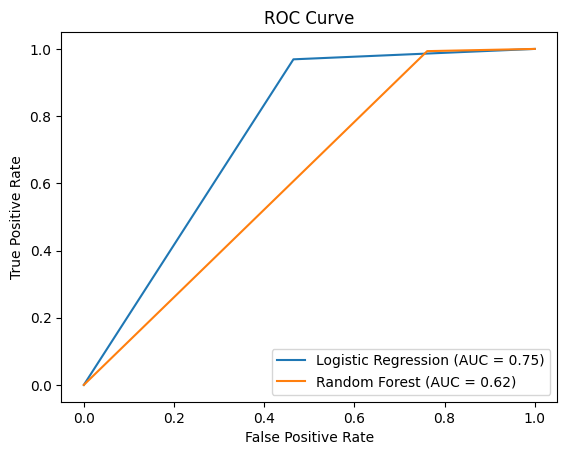

In [97]:
# Plot ROC curves:
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred2)

plt.figure()
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log))
plt.plot(fpr_forest, tpr_forest, label='Random Forest (AUC = {:.2f})'.format(roc_auc_forest))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Decision on model choice: Logistic Regression
Based on the metrics evaluated, we will conduct further fine-tuning on our Logistic Regression model. As our data is reasonably balanced (check this), and metrics such s...

## Fine-Tuning Pipeline